# Part II - Effects Of Bike Share On User's Race Duration And Distance travel
## by Solomon Muoghara 


## Investigation Overview

In this in investigation, i want to look at the effect bike share in the race of the particular data set have on both the distance traveled and the duration of the travel by different user types.


## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
There are 183412 listed bike rides and 16 features of which 9 variables are numeric; integers and floats, and 7 are Objects/Strings values.
Of which i expect the following variables; duration_sec, start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude, user_type, share_bike_for_all_trip will be instrumental for my analysis findings.

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# create new column to store the convertion duration_sec to minutes and delete the duration_sec column 
df['duration_min'] = df.duration_sec/60
df.drop(columns = 'duration_sec', inplace=True)

In [4]:
#creating a new column Distance to calculate the distance between start and end points 
def haversine(lat1, lon1, lat2, lon2):
    """The function calculates the distance between two points using the longitude and latitude of the 
    start and end points denoted as start points: lon1 and lat1, end points: lon2 and lat2. 
    
    The function performs the standard conversion to meters format which is under the variable R and 
    other haversine latitude and longitude calculations using the python math module.
    
    The function returns the distance between the two points in meters.
    """
    import math
    R = 6373.0 * 1000
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    return R *2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

# the function haversine is being applied to the dataframe the return being stored in a new column df.race_distance 
df['race_distance'] = df.apply(lambda x: haversine(x['start_station_latitude'], x['start_station_longitude'], x['end_station_latitude'], x['end_station_longitude']), axis=1)


## Distribution of Time Duration

The plot is multimodal and you can notice the highest scale between the 200 and 300 minutes, with the very low between 1000 and 1800 minutes. Which is to say that most rides spent around 250 to 300 minutes.

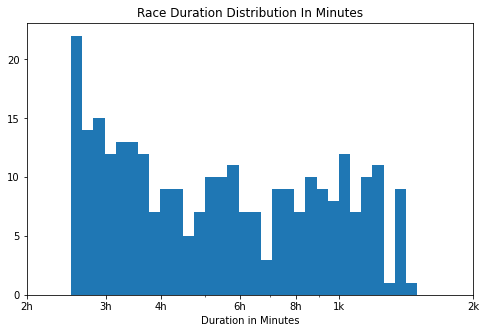

In [5]:
# plotting the duration_min using a log transform 
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.title('Race Duration Distribution In Minutes')
plt.xscale('log')
plt.xlim([250, 2e3])
plt.xticks([2e2,3e2,4e2,6e2,8e2,1e3, 2e3], ['2h','3h','4h','6h','8h','1k', '2k'])
plt.xlabel('Duration in Minutes')
plt.show()

## Distribution of Race Distance 

The Distribution appears multimodal with less count at the start and the end. The peek of the chart appears around the middle, showing the densely populated plot from the 40k point to the 200k point, of which the peek of the chart is approximately 100k to 120k meters. This plot shows that more racers travel around 40,000 to 200,000 meters.


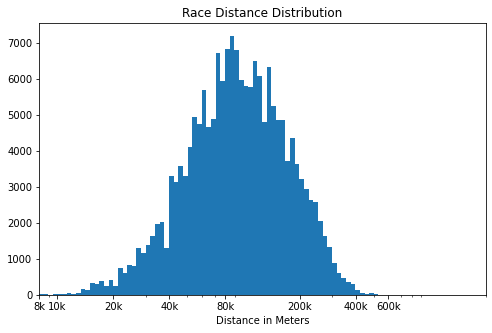

In [6]:
# plotting the race_distance in a log transform format 
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['race_distance'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'race_distance', bins = bins)
plt.title('Race Distance Distribution')
plt.xscale('log')
plt.xlim([10000, 2e6])
plt.xticks([8e3,1e4,2e4,4e4,8e4,2e5,4e5,6e5], 
           ['8k','10k','20k','40k','80k','200k','400k','600k'])
plt.xlabel('Distance in Meters')
plt.show()

## User Type and Bike Share against Time Duration

The visualization plots three variables against each other, bike_share..., user_type and duration_min. Here, it also shows user_type = Customer have no value under bike_share...= Yes, which means no customer shared their bike but it does have a higher value under bike_share.. = No, which means that more user_type = Customer who didn't share their bike for all trip spend more time on the road getting to their end points than both subscribers who share and didn't share.


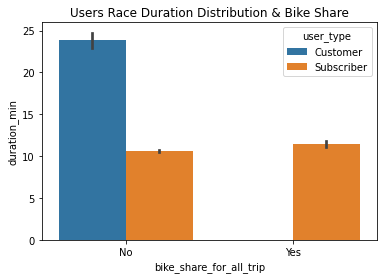

In [7]:
sb.barplot(data=df, hue='user_type', y='duration_min',x='bike_share_for_all_trip',)
plt.title('Users Race Duration Distribution & Bike Share');


## User Type and Bike Share against Race Distance 

The visualization plots three variables against each other, bike_share..., race_distance and user_type. Again, no user_type = customer value on bike_share... = Yes and also customer who didn't share their bike travelling longer distance than both subscribers who share their bike and those who didn't.

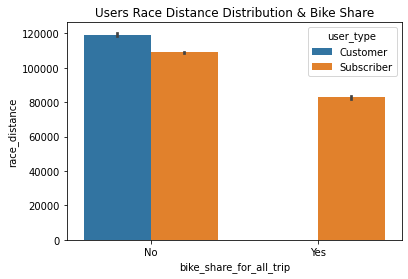

In [8]:
sb.barplot(data=df, x='bike_share_for_all_trip',y='race_distance',hue='user_type',)
plt.title('Users Race Distance Distribution & Bike Share');


In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt